In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

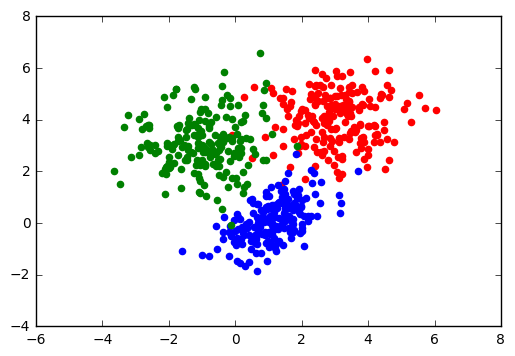

In [7]:
mean_01=[3.0,4.0]
mean_02=[1.0,0.0]
mean_03=[-1.0,3.0]
conv_01=[[1.0,0.0],[0.0,1.0]]
conv_02=[[0.75,0.4],[0.4,0.6]]
conv_03=[[1.0,0.0],[0.0,1.0]]
dist_01=np.random.multivariate_normal(mean_01,conv_01,200)
dist_02=np.random.multivariate_normal(mean_02,conv_02,200)
dist_03=np.random.multivariate_normal(mean_03,conv_03,200)

plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue')
plt.scatter(dist_03[:,0],dist_03[:,1],color='green')

    

plt.show()    


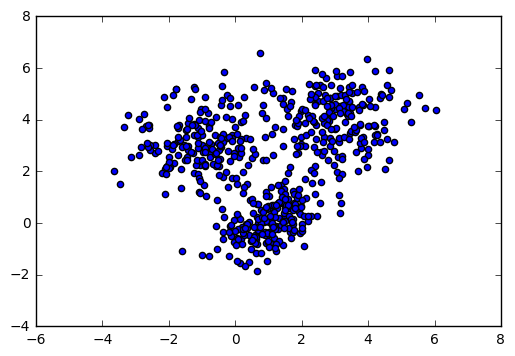

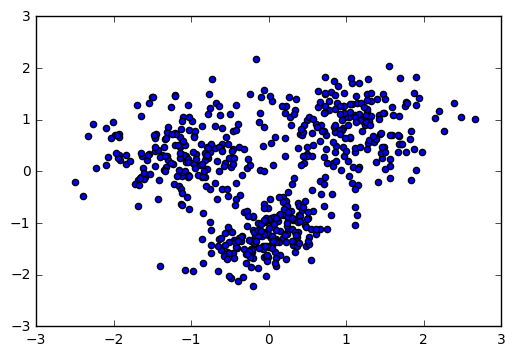

In [74]:
labels = np.zeros(600,)##generating labels
labels[:200] = 1.0
labels[200:400] = 2.0
labels[400:600]=3.0



X_data = np.zeros((600, 2))
X_data[:200, :] = dist_01
X_data[200:400, :] = dist_02
X_data[400:600, :] = dist_03

plt.figure(0)
plt.scatter(X_data[:, 0], X_data[:, 1])##original data

X_std = (X_data - X_data.mean(axis=0))/X_data.std(axis=0)

plt.figure(1)
plt.scatter(X_std[:, 0], X_std[:, 1])##after standardization

plt.show()


In [75]:
def dist(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())

In [76]:
def knn(X_train, x, y_train, k=5):## x is the chosen example whose distance is calc with all entries in X_train
    vals = []
    
    for i in range(X_train.shape[0]):
        v = [dist(x, X_train[i, :]), y_train[i]]
        vals.append(v)###vals ia a list whos each entry is of the form [distance b/w x and ith training example,label[i]]
    
    updated_vals = sorted(vals, key=lambda x: x[0])#sort on basis of first entry of vals i.e distances
    pred_arr1 = np.asarray(updated_vals[:k])##taking first k examples
    pred_arr = np.unique(pred_arr1[:, 1], return_counts=True)
    ##pred_arr is a tuple 
    ##first elementof tuple i.e pred_arr[0] is an array of unique labels in k examples
    ##second element of tuple i.e pred_arr[1] is no. of times the corrosponding label(in pred_arr[0]) appears 
    
    j = pred_arr[1].argmax()##returns index of higher no. in pred_arr[1]
                               #pred_arr[0][j] is the predicted label    i.e (jth element of array pred_arr[0])
    return pred_arr[0][j]

In [91]:
point=np.random.uniform(low=X_std.min(),high=X_std.max(),size=(1,2))##generates random point 
point

array([[-1.1530678 , -0.82376769]])

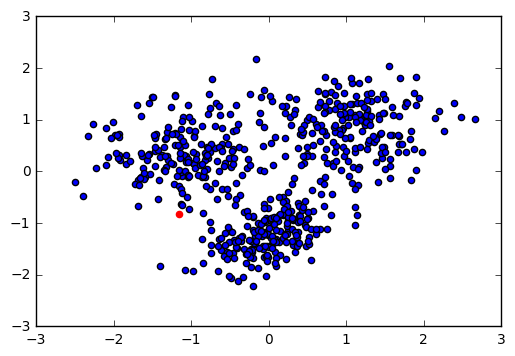

In [92]:
plt.figure(1)

plt.scatter(X_std[:, 0], X_std[:, 1])
plt.scatter(point[0,0],point[0,1],color='red')###plotting test point with red
plt.show()

In [93]:
cluster_no = knn(X_std, point, labels, k=7)
print cluster_no ###cluster to which test point belongs

3.0
